Today is going to be all about visualizing data. The dataset we've chosen to start with is [this awesome Pokemon dataset](https://github.com/n2cholas/pokemon-analysis). Because why not start with something fun?

We're using a few different libraries today:
- matplotlib.pyplot is the library we typically use for making graphs with Python.
- seaborn is built on top of matplotlib, and makes it easy to make extra-pretty graphs!
- pandas is for working with dataframes. We'll use it to store and manipulate our datasets.
- ast and numpy are things we're using because of the way our input data is formatted. You probably don't need to worry about them for the purposes of this tutorial! We used numpy last week, and you'll probably see it again in the future.

We can give libraries a shorter name when we import them so we won't have to type as much later on.

Import libraries:

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import ast

plt.style.use('seaborn-ticks')

Load the datasets:

In [13]:
pokemon_data = pd.read_csv("https://raw.githubusercontent.com/n2cholas/pokemon-analysis/master@%7B2019-03-13%7D/pokemon-data.csv", 
                           sep = ';', converters={'Types':ast.literal_eval, 'Abilities':ast.literal_eval, 'Moves':ast.literal_eval})
move_data = pd.read_csv('https://raw.githubusercontent.com/n2cholas/pokemon-analysis/master@%7B2019-03-13%7D/move-data.csv', 
                        sep = ';', index_col = 0)
for var in ['Power', 'Accuracy']:
    move_data[var].replace('None', np.nan, inplace=True)
    move_data[var] = move_data[var].astype(float)

There are a couple of new things going on here that we haven't seen yet. You probably don't need to worry about these, but here's what we're doing if you're curious:
- "sep" tells pandas what type of character separates the items. By default this is a comma (CSV stands for "comma separated values" but for whatever reason our datasets use a semicolon.
- A few of our columns contain lists. If we use the default settings, these will get loaded as strings, which we definitely don't want. We can use "converters" to have pandas try to load things like lists when it sees them.
- "index_col" tells pandas that one of the columns in the data should be used as the index. If we don't provide this, pandas will make a new index and we'll end up with an extra row of numbers that we don't need.
- Whoever put together the move_data dataset used "None" when no value was available for Power or Accuracy. What this ends up doing is making the whole column come out as strings, which we don't want. We can fix this by 1) replacing the string "None" with nan (not a number), and 2) turning the column into floats (which are basically numbers with decimal points).

Our datasets are now stored as something called a <b>dataframe</b>. Let's see what our first dataframe looks like:

In [14]:
pokemon_data.head()

,Name,Types,Abilities,Tier,HP,Attack,Defense,Special Attack,Special Defense,Speed,Next Evolution(s),Moves
0,Abomasnow,"[Grass, Ice]","[Snow Warning, Soundproof]",PU,90,92,75,92,85,60,[],"[Ice Punch, Powder Snow, Leer, Razor Leaf, Icy..."
1,Abomasnow-Mega,"[Grass, Ice]",[Snow Warning],NUBL,90,132,105,132,105,30,[],"[Ice Punch, Powder Snow, Leer, Razor Leaf, Icy..."
2,Abra,[Psychic],"[Inner Focus, Magic Guard, Synchronize]",LC,25,20,15,105,55,90,['Kadabra'],"[Teleport, Ally Switch, Barrier, Encore, Fire ..."
3,Absol,[Dark],"[Justified, Pressure, Super Luck]",PU,65,130,60,75,60,75,[],"[Perish Song, Future Sight, Me First, Razor Wi..."
4,Absol-Mega,[Dark],[Magic Bounce],RUBL,65,150,60,115,60,115,[],"[Perish Song, Future Sight, Me First, Razor Wi..."


Each row is a Pokemon, and each column contains a particular piece of information about that Pokemon.

Let's get started making some plots of the Pokemon data using <b>pyplot</b>! We'll start by plotting the Attack and HP stats for each Pokemon. You can try plotting other stats by changing "HP" and "Attack" to one of the other column names that contains numbers (see the cell above).

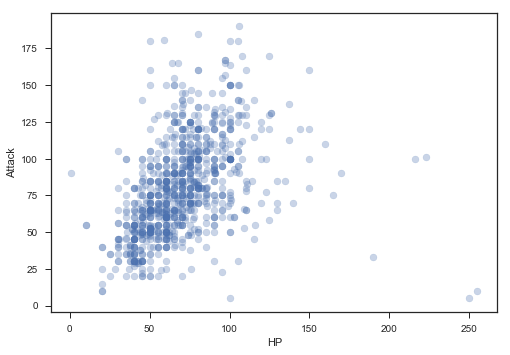

In [15]:
plt.scatter(pokemon_data.HP, pokemon_data.Attack, alpha = 0.3)
plt.xlabel('HP')
plt.ylabel('Attack')
plt.show()

Let's try something a bit more complicated. What if we wanted to know how many moves each Pokemon has? We don't have that number already calculated, but we do have a list of moves and can check its length using the "len" function. We can do that pretty easily by using a for loop to go through each thing in the "Moves" column.

In [16]:
moves_list = []
for moves in pokemon_data.Moves:
    moves_list.append(len(moves))
pokemon_data['Number of Moves'] = moves_list

That last line added a new column to our dataframe called "Number of Moves." Adding columns to dataframes works a lot like assigning variables.

But! There's an easier way! A **list comprehension** lets us take a simple for loop like the one above and write it in one line. The output of a list comprehension is always a new list, and we don't have to make any messy intermediate variables.

Anything you can do with the list comprehension you can always do with a regular for loop, but they can make your code a lot easier to write and to read! The cell below does exactly the same thing as the one above, but it takes one line instead of four.

In [17]:
pokemon_data['Number of Moves'] = [len(a) for a in pokemon_data.Moves]

Now let's try plotting that. If we want to look at three variables at a time, we can map one of the variables to the color of the points.

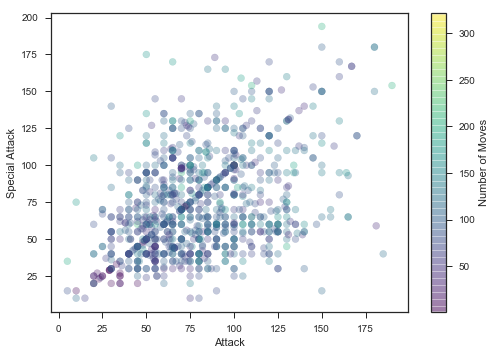

In [18]:
plt.scatter(pokemon_data['Attack'], pokemon_data['Special Attack'], 
            c = pokemon_data['Number of Moves'], alpha = 0.3, cmap = 'viridis')
c = plt.colorbar()
c.set_label('Number of Moves')
plt.xlabel('Attack')
plt.ylabel('Special Attack')
plt.show()

If you click inside the parentheses in plt.scatter(), a helpful box pops up with some of the other options you have with this function.

Try making scatter plots of some of the other variables from the Pokemon dataset, and playing with some of the options in the scatter function.

Let's move on and look at the second dataframe, which has information about the individual moves the Pokemon can do.

In [19]:
move_data.head()

,Name,Type,Category,Contest,PP,Power,Accuracy,Generation
Index,,,,,,,,
1,Pound,Normal,Physical,Tough,35,40.0,100.0,1
2,Karate Chop,Fighting,Physical,Tough,25,50.0,100.0,1
3,Double Slap,Normal,Physical,Cute,10,15.0,85.0,1
4,Comet Punch,Normal,Physical,Tough,15,18.0,85.0,1
5,Mega Punch,Normal,Physical,Tough,20,80.0,85.0,1


What is the power of most of the moves? We can make a histogram to see that moves with a power between 50-80 or so are the most common.

//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


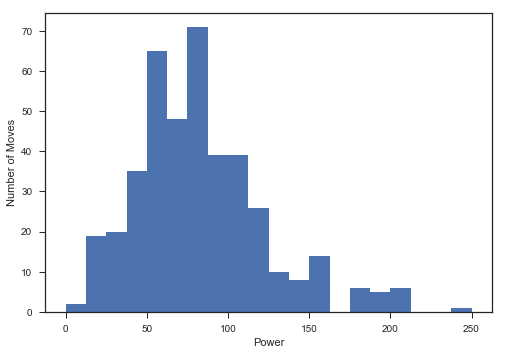

In [20]:
plt.hist(move_data.Power, range = (0, move_data.Power.max()), bins = 20)
plt.xlabel('Power')
plt.ylabel('Number of Moves')
plt.show()

How does power vary depending on the type of move? A bar graph is a good way to look at this. We can also making bar graphs pretty easily using pyplot directly, but <b>Seaborn</b> makes it easy by doing the averaging for us.

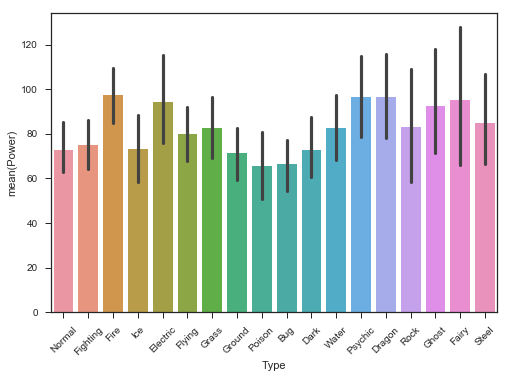

In [21]:
sns.barplot('Type', 'Power', data = move_data)
plt.xticks(rotation = 45)
plt.show()

Another fun plot using Seaborn is the swarmplot. This plots the individual data points so you can see both their distribution and how many there are at a glance. You can make this plot on its own, or overlay it on a bar plot.

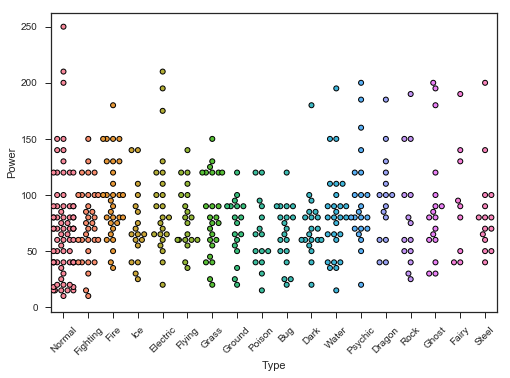

In [22]:
sns.swarmplot('Type', 'Power', data = move_data, edgecolor = 'black', linewidth = 1)
plt.xticks(rotation = 45)
plt.show()

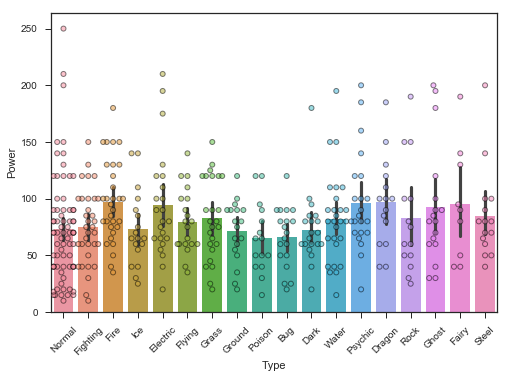

In [23]:
sns.barplot('Type', 'Power', data = move_data)
sns.swarmplot('Type', 'Power', data = move_data, edgecolor = 'black', linewidth = 1, alpha = 0.5)
plt.xticks(rotation = 45)
plt.show()

What's the relationship between the power of a move and PP (how many times we can use it in a row)?

We can also use colors and/or symbols to represent a third variable. This is like what we did with "Number of moves" earlier, but since we're talking about categories now instead of numbers, we need to use a for loop to plot each category one at a time.

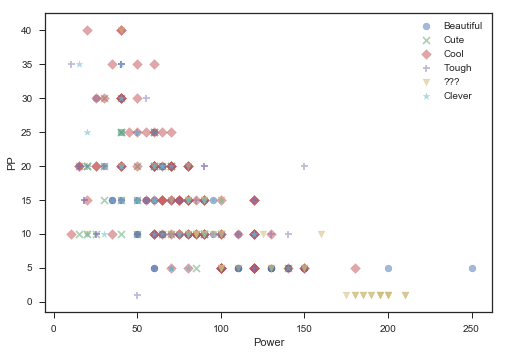

In [24]:
for contest, marker in zip(set(move_data.Contest), ['o', 'x', 'D', '+', 'v', '*']):
    plt.scatter('Power', 'PP', data = move_data[move_data.Contest == contest], marker = marker, alpha = 0.5, label = contest)
plt.xlabel('Power')
plt.ylabel('PP')
plt.legend()
plt.show()

What else can you think of to plot from either of these datasets?

For more inspiration, check out [the Seaborn gallery](https://seaborn.pydata.org/examples/index.html). Some types of graph that might work well for the datasets we have are the jointplot, scatterplot (this does the same thing as plt.scatter, but it has some nice extra features), violinplot, pairplot, or kdeplot. Are there any particularly cool patterns that you're able to find?